In [ ]:
!pip install geopandas

In [ ]:
! pip install --upgrade folium

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import geopandas as gpd
import folium

from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

## Data Understanding

### 1. Load the dataset

In [2]:
# Load the Melbourne Housing Sales data
mel = pd.read_csv("Melbourne_housing_FULL.csv")

In [3]:
print("Number of Samples  : %d" % mel.shape[0])
print("Number of features : %d" % mel.shape[1])

Number of Samples  : 29217
Number of features : 21


### 2. View the dataset

In [4]:
# First five rows
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 3. Summary of the dataset 

In [5]:
mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


### 4. Numeric attributes

In [6]:
numeric_cols = mel.select_dtypes(exclude=['object']).columns.tolist()
print("Numeric attributes : {}".format(numeric_cols))

Numeric attributes : ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


### 5. Categorical attributes

In [7]:
categorical_cols = mel.select_dtypes(include=['object']).columns.tolist()
print("Categorical attributes : {}".format(categorical_cols))

Categorical attributes : ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


### 6. Data visualization

#### Room
Most of the houses are having 2, 3 or 4 rooms.

Text(0.5, 1.0, 'House Count by Number of Rooms')

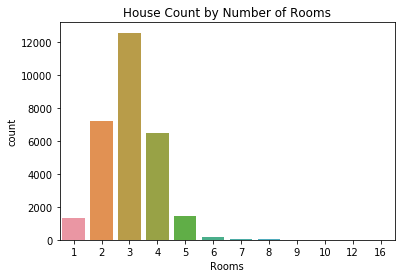

In [8]:
sns.countplot(mel['Rooms'])
plt.title("House Count by Number of Rooms")

The house prices appears to be increasing with rooms size

Text(0.5, 1.0, 'Mean House Price by Rooms Size')

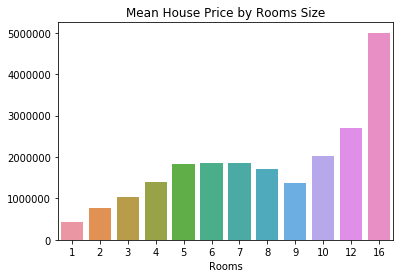

In [9]:
# Drop rows with missing values for feature 'Rooms' & 'Price'
# Calculate mean price of the house for every number of rooms.
mel_df1 =  mel[['Rooms', 'Price']].dropna(axis=0).groupby('Rooms')['Price'].mean()
# Bar plot
sns.barplot(mel_df1.index, mel_df1.values)
plt.title("Mean House Price by Rooms Size")

#### House Type
h - house,cottage,villa, semi,terrace;   
u - unit, duplex;   
t - townhouse;  

Text(0.5, 1.0, 'House Count by House Type')

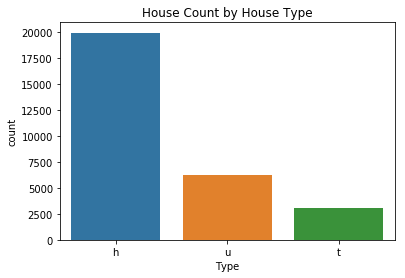

In [10]:
sns.countplot(mel['Type'])
plt.title("House Count by House Type")

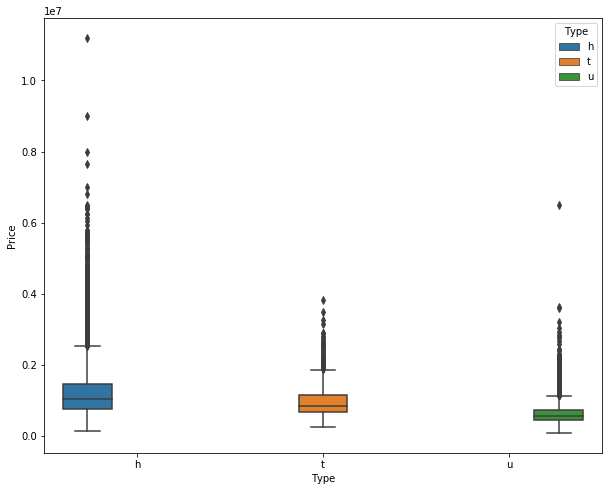

In [11]:
# Drop rows with missing values for feature 'Type' & 'Price'
mel_df2 = mel[['Type', 'Price']].dropna(axis=0)

# Box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Type', y='Price', data=mel_df2, hue='Type')

#### Bathroom
Most of the houses are having number of bathrooms 1 or 2

Text(0.5, 1.0, 'House Count by Bathroom Size')

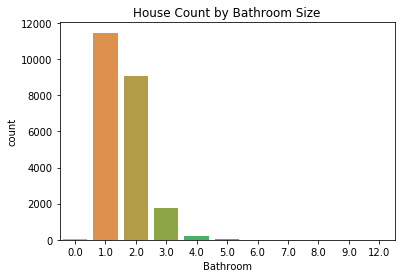

In [12]:
sns.countplot(mel['Bathroom'])
plt.title("House Count by Bathroom Size")

Text(0.5, 1.0, 'Mean House Price by Bathroom Size')

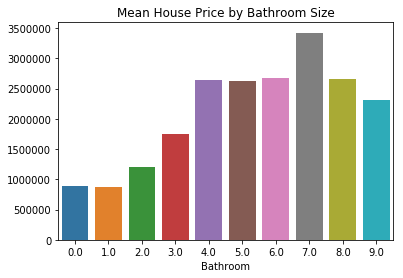

In [13]:
# Drop rows with missing values for feature 'Bathroom' & 'Price'
# Calculate the mean house price by bathroom size
mel_df3 = mel[['Bathroom', 'Price']].dropna(axis=0).groupby('Bathroom')['Price'].mean()
# Bar plot
sns.barplot(mel_df3.index, mel_df3.values)
plt.title("Mean House Price by Bathroom Size")

#### Car

Text(0.5, 1.0, 'House Count by Number of Carspots')

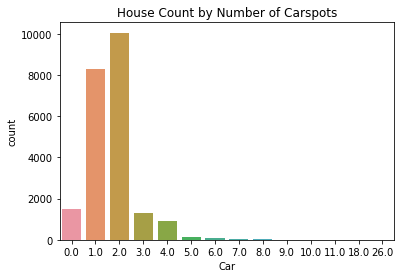

In [14]:
sns.countplot(mel.Car)
plt.title("House Count by Number of Carspots")

#### Distance
The house price appears to be decreasing if the distance from CBD (Central Business Dsitrict) increases.

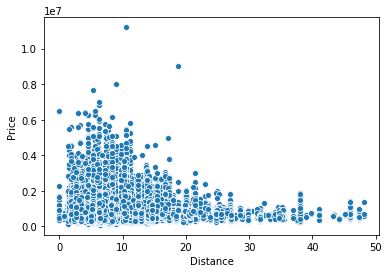

In [15]:
# Drop rows with missing values for feature 'Distance' & 'Price'
mel_df5 = mel[['Distance', 'Price']].dropna(axis=0)
# Scatter plot
sns.scatterplot(x='Distance', y='Price', data=mel_df5)

#### YearBuilt
Historic properties are most expensive ones!

Text(0.5, 1.0, 'Mean House Price by Year Built')

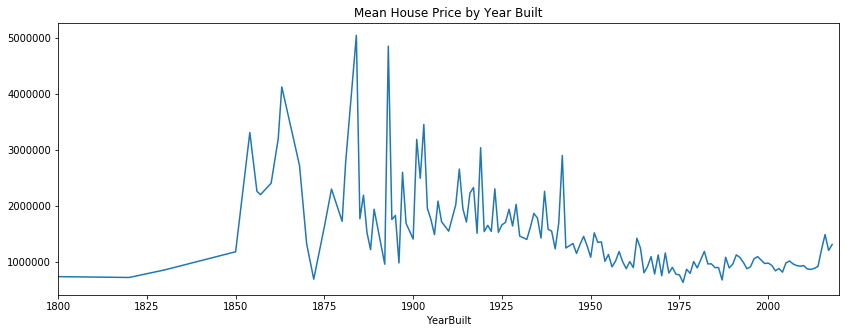

In [16]:
# Drop rows with missing values for feature 'YearBuilt' & 'Price'
# Calculate the mean house price by year built.
mel_df6 = mel[['YearBuilt', 'Price']].dropna(axis=0).groupby('YearBuilt')['Price'].mean()

# line plot
plt.figure(figsize=(14,5))
sns.lineplot(mel_df6.index, mel_df6.values)
plt.xlim((1800, 2020))
plt.title("Mean House Price by Year Built")

#### Regionname
Southern Metropolitan is an expensive region to buy house.

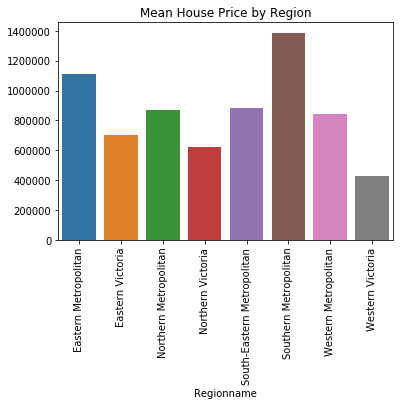

In [17]:
# Drop rows with missing values for feature 'Regionname' & 'Price'
# Calculate the mean house price by Regionname.
mel_df7 = mel[['Regionname', 'Price']].dropna(axis=0).groupby('Regionname')['Price'].mean()

sns.barplot(mel_df7.index, mel_df7.values)
plt.title('Mean House Price by Region')
plt.xticks(rotation='vertical')
plt.show()

### Creating interactive maps using folium library

In [18]:
# location sets the initial center of the map. We use the latitude (37.8136° S) and longitude (144.9631° E) of the city of Melbourne.
# tiles changes the styling of the map.
# zoom_start sets the initial level of zoom of the map, where higher values zoom in closer to the map.

m_1 = folium.Map(location=[-37.8136, 144.9631], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

#### Identify house locations with prices > 5 million

In [19]:
expensive_houses = mel[mel.Price >= 5000000].dropna()

# Create a map
m_2 = folium.Map(location=[-37.8136, 144.9631], tiles='cartodbpositron', zoom_start=12)

# We add markers to the map with folium.Marker(). Each marker below corresponds to a different house price.
for idx, row in expensive_houses.iterrows():
    folium.Marker([row['Lattitude'], row['Longtitude']], popup=row['Price']).add_to(m_2)

# Display map
m_2

####  Identify house locations with prices < 0.25 million

In [20]:
cheap_houses = mel[mel.Price <= 250000].dropna()

# Create a map
m_3 = folium.Map(location=[-37.8136, 144.9631], tiles='cartodbpositron', zoom_start=12)

# We add markers to the map with folium.Marker(). Each marker below corresponds to a different house price.
for idx, row in cheap_houses.iterrows():
    folium.Marker([row['Lattitude'], row['Longtitude']], popup=row['Price']).add_to(m_3)

# Display map
m_3

##  Data Preparation: Data Cleaning

###  1. Duplicate values

In [21]:
# Duplicate rows
mel[mel.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [22]:
# Remove duplicates
mel_dupl_removed = mel.drop_duplicates()

In [23]:
print("Number of rows before removing the duplicates : {}".format(mel.shape[0]))
print("Number of rows after removing the duplicates  : {}".format(mel_dupl_removed.shape[0]))

Number of rows before removing the duplicates : 29217
Number of rows after removing the duplicates  : 29216


In [24]:
mel = mel_dupl_removed.copy()

### 2. Variable type

In [25]:
# counts of unique dtypes
mel.get_dtype_counts()

float64    11
int64       2
object      8
dtype: int64

In [26]:
float64_attributes = mel.select_dtypes(include=['float64']).columns.tolist()
print("float64 attributes : {}".format(float64_attributes))

int64_attributes = mel.select_dtypes(include=['int64']).columns.tolist()
print("\nint64 attributes : {}".format(int64_attributes))

object_attributes = mel.select_dtypes(include=['object']).columns.tolist()
print("\nobject attributes : {}".format(object_attributes))


float64 attributes : ['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']

int64 attributes : ['Rooms', 'Postcode']

object attributes : ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


### 3.  Missing value treatment

In [27]:
# Detect missing value columns and their counts
missing = mel.isnull().sum()
missing = missing[missing>0]
missing

Price             6366
Bedroom2          6552
Bathroom          6558
Car               6860
Landsize          9568
BuildingArea     17400
YearBuilt        15744
CouncilArea          2
Lattitude         6339
Longtitude        6339
Regionname           2
Propertycount        2
dtype: int64

In [28]:
from sklearn.impute import SimpleImputer

mel_numerical_data = mel.select_dtypes(exclude=['object']).copy()
mel_categorical_data = mel.select_dtypes(include=['object']).copy()

# Use SimpleImputer for imputing missing numerical feature values. Default strateguy is mean
imputer = SimpleImputer()
mel_numerical_data_imputed = pd.DataFrame(imputer.fit_transform(mel_numerical_data), columns=mel_numerical_data.columns,
                                          index=mel_numerical_data.index)

#Replace missing categorical feature value with a value "Unknown" 
missing_categorical_cols = ['CouncilArea', 'Regionname']
for col in missing_categorical_cols:
    mel_categorical_data[col] = mel_categorical_data[col].fillna("Unknown")
    

# concat dataframes
mel_data = pd.concat([mel_numerical_data_imputed, mel_categorical_data], axis=1)

### 4. Outlier Treatment

In [29]:
# Numerical features
numerical_cols = mel_numerical_data.columns.tolist()

print("Numerical Features : {}".format(numerical_cols))

Numerical Features : ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


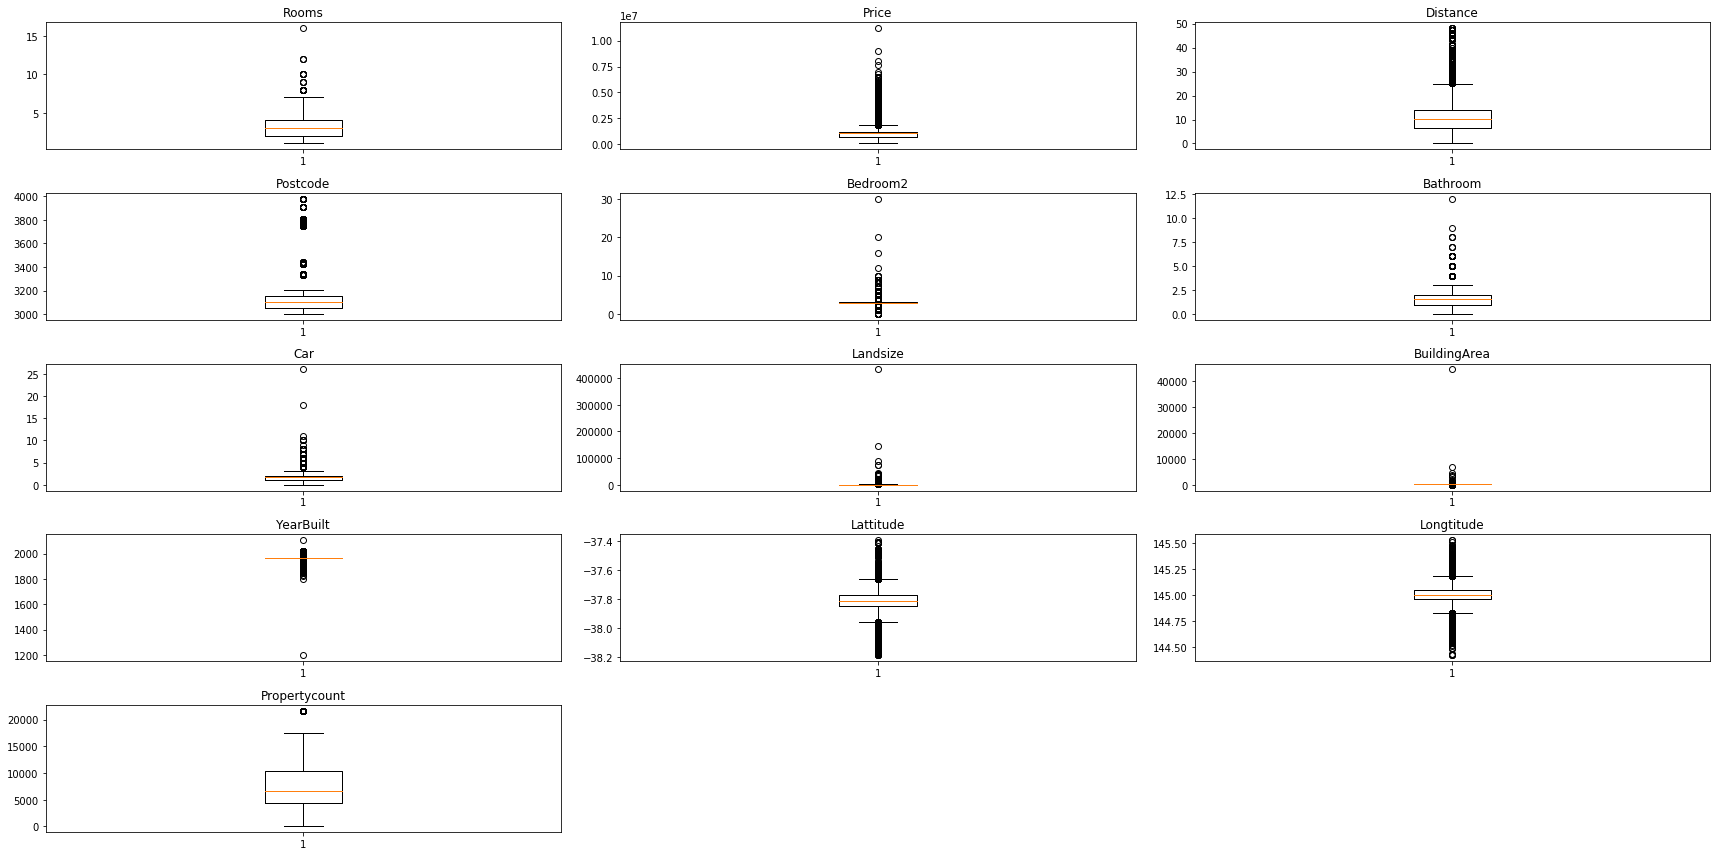

In [30]:
# Box plots 
plt.figure(figsize=(24,12))
for i, col in zip(range(len(numerical_cols)), numerical_cols):
    plt.subplot(5, 3, i+1)
    plt.boxplot(mel_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Outlier detection using Interquartile Range (IQR)

In [31]:
# An outlier step is calculated as 1.5 times the IQR.
# A row with a feature that is beyond an outlier step is considered an outlier.

for col in numerical_cols:
    outliers_idx = np.array([], dtype='int64')
    # calculate Q1 (25th percentile)
    Q1 = np.percentile(mel_data[col], 25)
    # calculate Q3 (75th percentile)
    Q3 = np.percentile(mel_data[col], 75)
    # calculate IQR
    IQR = Q3-Q1
    # use the IQR to calculate outlier step
    step = IQR * 1.5
    # Identify outliers
    outliers = mel_data[~((mel_data[col] >= Q1 - step) & (mel_data[col] <= Q3 + step))]
    # save outliers index values
    outliers_idx = np.append(outliers_idx, outliers.index.values)
    # print number of outliers
    print("Number of outliers detected in feature '{}' using IQR range : {}".format(col, len(outliers_idx)))

Number of outliers detected in feature 'Rooms' using IQR range : 33
Number of outliers detected in feature 'Price' using IQR range : 2080
Number of outliers detected in feature 'Distance' using IQR range : 1078
Number of outliers detected in feature 'Postcode' using IQR range : 671
Number of outliers detected in feature 'Bedroom2' using IQR range : 12749
Number of outliers detected in feature 'Bathroom' using IQR range : 303
Number of outliers detected in feature 'Car' using IQR range : 1177
Number of outliers detected in feature 'Landsize' using IQR range : 987
Number of outliers detected in feature 'BuildingArea' using IQR range : 10505
Number of outliers detected in feature 'YearBuilt' using IQR range : 13169
Number of outliers detected in feature 'Lattitude' using IQR range : 1566
Number of outliers detected in feature 'Longtitude' using IQR range : 2475
Number of outliers detected in feature 'Propertycount' using IQR range : 735


#### Quantile-based Flooring and Capping

In [32]:
# calculate 99% and 1% percentile as cap and floor for column 'Price'

percentiles = mel_data['Price'].quantile([0.01,0.99]).values
mel_outlier_removed = mel_data[((mel_data['Price'] > percentiles[0]) & (mel_data['Price'] < percentiles[1]))]

print("Number of rows before the outlier removal : {}".format(mel_data.shape[0]))
print("Number of rows after the outlier removal  : {}".format(mel_outlier_removed.shape[0]))

Number of rows before the outlier removal : 29216
Number of rows after the outlier removal  : 28629


In [33]:
mel_data = mel_outlier_removed.copy()

## Data Preparation : Feature Engineering

In [34]:
# create x and y variables
X = mel_data.drop("Price", axis=1)
Y = mel_data["Price"].copy()

### 1. Feature Transformation

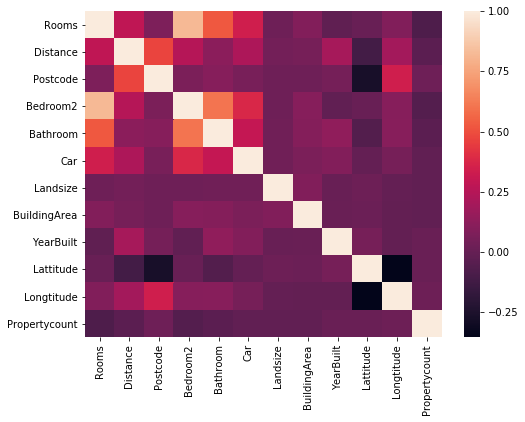

In [38]:
X_numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Find corelation among numerical features
# There is a strong corelation between the feature 'Rooms'and 'Bedroom2' and thus we can remove the feature 'Bedroom2'.
corr_matrix = X[X_numerical_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix)

In [40]:
# We will create a new feature 'PropertyAge' using feature 'YearBuilt' and current year, and then we will drop the feature 'YearBuilt'.
X['PropertyAge'] = 2020 - X['YearBuilt']

In [41]:
# We will also drop an unwanted location specific attributes other than 'Regionname' and seller specific attributes.
X_removed = X.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 
                         'Bedroom2', 'YearBuilt'], axis=1)

### 2.  Dummy encoding

In [42]:
# Convert categorical variable into dummy/indicator variables.
X_encoded = pd.get_dummies(X_removed, columns=['Type', 'Regionname'])

# display first 5 rows
X_encoded.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,PropertyAge,...,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Unknown,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2.0,2.5,1.0,1.0,126.0,157.416931,-37.8014,144.9958,4019.0,55.064727,...,0,0,0,1,0,0,0,0,0,0
1,2.0,2.5,1.0,1.0,202.0,157.416931,-37.7996,144.9984,4019.0,55.064727,...,0,0,0,1,0,0,0,0,0,0
2,2.0,2.5,1.0,0.0,156.0,79.000000,-37.8079,144.9934,4019.0,120.000000,...,0,0,0,1,0,0,0,0,0,0
3,3.0,2.5,2.0,1.0,0.0,157.416931,-37.8114,145.0116,4019.0,55.064727,...,1,0,0,1,0,0,0,0,0,0
4,3.0,2.5,2.0,0.0,134.0,150.000000,-37.8093,144.9944,4019.0,120.000000,...,0,0,0,1,0,0,0,0,0,0


### 3. Standardization

In [43]:
# Since the data contains few outliers, we will scale features using statistics that are robust to outliers.
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_encoded)

### 4. Feature importances

In [45]:
# Apply Random Forest Regressor with the number of trees in the forest (n_estimators) is set to 20
regr = RandomForestRegressor(n_estimators=20)

# Fit the regressor on X, Y
regr.fit(X_scaled, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

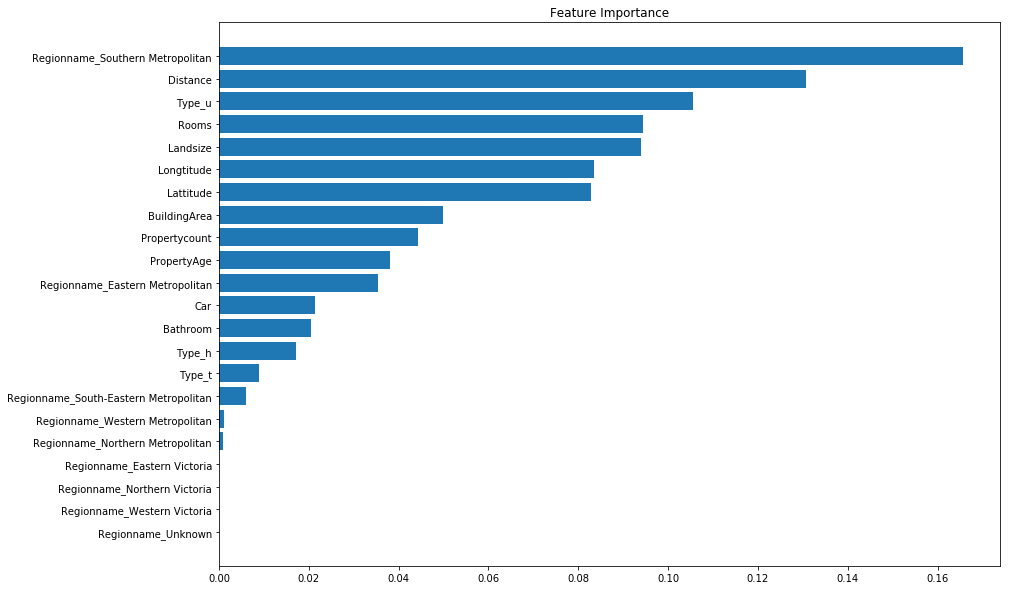

In [59]:
# Return the feature importances
importances = regr.feature_importances_

# create series
feature_rank = pd.Series(importances, index=X_encoded.columns).sort_values(ascending=True)

# Display feature importance
plt.figure(figsize=(14,10))
plt.title('Feature Importance')
plt.barh(feature_rank.index, feature_rank.values)
plt.show()

Top 5 important features are;
1. South Metropolitan Region
2. Distance from city center
3. House type 'u' (unit or duplex)
4. Number of Rooms
5. Landsize